In [5]:
import pandas as pd
import seaborn as sns
adres = "/workspace/DeepLearningFundamentals/Dokumanlar/03_DeepLearning/data/irrigation_machine.csv"
df = pd.read_csv(adres,index_col=[0])
df.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [6]:
df.shape

(2000, 23)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(64,input_shape=(20,),activation="relu"))

model.add(Dense(3,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])





In [9]:
df.describe()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,1.901000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,1.518668,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,2.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,3.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,9.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000


In [14]:
y = df.iloc[:,-3:]
X = df.drop(["parcel_0","parcel_1","parcel_2"],axis=1).values

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [21]:
sonuclar = model.fit(X_train_scaled,y_train,epochs=25,validation_data=(X_test_scaled,y_test))

Epoch 1/25
50/50 [==============================] - 0s 4ms/step - loss: 0.1274 - accuracy: 0.5713 - val_loss: 0.3573 - val_accuracy: 0.5975
Epoch 2/25
50/50 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 0.5694 - val_loss: 0.3500 - val_accuracy: 0.6050
Epoch 3/25
50/50 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.5675 - val_loss: 0.3470 - val_accuracy: 0.5925
Epoch 4/25
50/50 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.5650 - val_loss: 0.3443 - val_accuracy: 0.5975
Epoch 5/25
50/50 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.5625 - val_loss: 0.3459 - val_accuracy: 0.5900
Epoch 6/25
50/50 [==============================] - 0s 2ms/step - loss: 0.1034 - accuracy: 0.5656 - val_loss: 0.3477 - val_accuracy: 0.5950
Epoch 7/25
50/50 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.5594 - val_loss: 0.3478 - val_accuracy: 0.5950
Epoch 8/25
50/50 [==

In [23]:
sonuclar.history["val_loss"]

[0.35731276869773865,
 0.35004889965057373,
 0.346979022026062,
 0.3443268835544586,
 0.34594276547431946,
 0.3477095663547516,
 0.34775036573410034,
 0.3432886600494385,
 0.34704723954200745,
 0.346801221370697,
 0.3474009335041046,
 0.34809407591819763,
 0.3478700518608093,
 0.34855738282203674,
 0.3454234004020691,
 0.3484932780265808,
 0.34765201807022095,
 0.3465268611907959,
 0.3484002947807312,
 0.3488551378250122,
 0.34960269927978516,
 0.3510979413986206,
 0.34728068113327026,
 0.35161495208740234,
 0.3501632809638977]

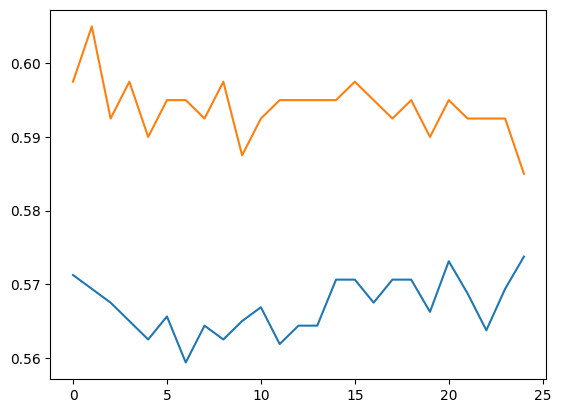

In [25]:
import matplotlib.pyplot as plt 
plt.figure()
plt.plot(sonuclar.history["accuracy"])
plt.plot(sonuclar.history["val_accuracy"])


In [20]:
# model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)
# preds = model.predict(X_test_scaled)
# pd.DataFrame(preds).head()

Epoch 1/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1079 - accuracy: 0.5656 - val_loss: 0.3141 - val_accuracy: 0.5656
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.5734 - val_loss: 0.3128 - val_accuracy: 0.5625
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.5633 - val_loss: 0.3161 - val_accuracy: 0.5594
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.5602 - val_loss: 0.3157 - val_accuracy: 0.5594
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.5664 - val_loss: 0.3157 - val_accuracy: 0.5625
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.5617 - val_loss: 0.3196 - val_accuracy: 0.5625
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1040 - accuracy: 0.5609 - val_loss: 0.3187 - val_accuracy: 0.5625
Epoch 8/100
4

,0,1,2
0,0.000005,1.000000,0.000286
1,0.993560,0.997123,0.741916
2,0.002246,1.000000,0.055463
3,1.000000,0.379904,0.000010
4,0.999922,0.879454,0.006189


In [19]:
import numpy as np
np.round(preds)

array([[0., 1., 0.],
       [1., 1., 1.],
       [0., 1., 0.],
       ...,
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.]], dtype=float32)